# Especialidad en Estadistica Aplicada 
## Tarea 6: Taller 6.2 - Redes Neuronales
## Mateo Orozco Baldovino

# **Ejemplo de aplicación con Redes Neuronales para el dataset de Iris**

**Descripción del dataset:**

**Objetivo:** El dataset Iris es utilizado para problemas de clasificación. El objetivo es predecir la especie de una flor de iris (clasificación) basada en las medidas de sus características físicas.

**Clases:** Hay tres clases (especies) de flores:

*   Setosa
*   Versicolor
*   Virginica

**Características:** El dataset contiene 150 observaciones, cada una con 4 características (medidas) que describen las flores:

* Largo del sépalo (en cm)
* Ancho del sépalo (en cm)
* Largo del pétalo (en cm)
* Ancho del pétalo (en cm)

**Distribución de las clases:**

* Cada clase tiene 50 ejemplos.
* Las clases Setosa y Versicolor están perfectamente separadas linealmente, mientras que Versicolor y Virginica están algo superpuestas, lo que hace que la clasificación entre estas últimas dos sea más difícil.

# **Taller 6 - Parte 2**

1. Efecto de los porcentajes de muestras de entrenamiento/prueba:

* **Instrucción:** Entrena una red neuronal utilizando diferentes divisiones de datos para entrenamiento y prueba (por ejemplo, 70/30, 80/20, 90/10). Compara los resultados de precisión, matriz de confusión y el tiempo de entrenamiento.

* **Preguntas:**
- ¿Cómo afecta el tamaño del conjunto de entrenamiento a la precisión de la red neuronal?
- ¿Qué relación observas entre el tamaño del conjunto de entrenamiento y el tiempo de cómputo?
- ¿Cuál es la configuración que ofrece un mejor balance entre tiempo y precisión?

2. Variación del número de capas y neuronas:

* **Instrucción:** Realiza pruebas variando el número de capas ocultas y neuronas. Usa al menos tres configuraciones distintas (por ejemplo: (5,5), (10,10), (20,20)).

* **Preguntas:**
- ¿Cómo influye el número de capas ocultas y neuronas en la precisión del modelo?
- ¿Qué configuración logra un mejor desempeño en términos de precisión y tiempo de cómputo?
- ¿Cuál es el impacto del incremento en las neuronas en el tiempo de entrenamiento?

3. Efecto de la función de activación:

* **Instrucción:** Cambia la función de activación de la red neuronal. Prueba al menos tres funciones: relu, tanh, y logistic.

* **Preguntas:**
- ¿Cómo afecta la elección de la función de activación a los resultados de precisión y matriz de confusión?
- ¿Qué función de activación logra un mejor tiempo de convergencia?
- ¿Qué diferencias observas en el comportamiento de la red para cada función de activación en términos de curva de aprendizaje?

4. Evaluación del tiempo de cómputo:

* **Instrucción:** Mide el tiempo de cómputo total para cada una de las configuraciones anteriores (variando porcentajes de entrenamiento/prueba, capas, neuronas, y función de activación).

* **Preguntas:**
- ¿Qué parámetros de la red tienen un mayor impacto en el tiempo de cómputo?
- ¿Cómo se puede mejorar el tiempo de ejecución sin perder demasiada precisión?
- ¿Cuál sería el mejor enfoque para lograr un balance entre precisión y tiempo de cómputo?



In [1]:
# Importar librerías
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Cargar el dataset
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
# Normalización de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# División del dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [5]:
# Crear el modelo de red neuronal
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42, verbose=True)

# Entrenar la red neuronal
mlp.fit(X_train, y_train)

Iteration 1, loss = 1.11338452
Iteration 2, loss = 1.10569392
Iteration 3, loss = 1.09805736
Iteration 4, loss = 1.09051295
Iteration 5, loss = 1.08296381
Iteration 6, loss = 1.07539672
Iteration 7, loss = 1.06794236
Iteration 8, loss = 1.06065806
Iteration 9, loss = 1.05345427
Iteration 10, loss = 1.04619666
Iteration 11, loss = 1.03904185
Iteration 12, loss = 1.03193827
Iteration 13, loss = 1.02484568
Iteration 14, loss = 1.01791069
Iteration 15, loss = 1.01104794
Iteration 16, loss = 1.00422229
Iteration 17, loss = 0.99743009
Iteration 18, loss = 0.99064390
Iteration 19, loss = 0.98401949
Iteration 20, loss = 0.97753654
Iteration 21, loss = 0.97104911
Iteration 22, loss = 0.96463177
Iteration 23, loss = 0.95831749
Iteration 24, loss = 0.95222275
Iteration 25, loss = 0.94621615
Iteration 26, loss = 0.94023527
Iteration 27, loss = 0.93427864
Iteration 28, loss = 0.92835139
Iteration 29, loss = 0.92248332
Iteration 30, loss = 0.91665360
Iteration 31, loss = 0.91084817
Iteration 32, los

,"hidden_layer_sizes hidden_layer_sizes: array-like of shape(n_layers - 2,), default=(100,)The ith element represents the number of neurons in the ithhidden layer.","(10, ...)"
,"activation activation: {'identity', 'logistic', 'tanh', 'relu'}, default='relu'Activation function for the hidden layer.- 'identity', no-op activation, useful to implement linear bottleneck, returns f(x) = x- 'logistic', the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).- 'tanh', the hyperbolic tan function, returns f(x) = tanh(x).- 'relu', the rectified linear unit function, returns f(x) = max(0, x)",'relu'
,"solver solver: {'lbfgs', 'sgd', 'adam'}, default='adam'The solver for weight optimization.- 'lbfgs' is an optimizer in the family of quasi-Newton methods.- 'sgd' refers to stochastic gradient descent.- 'adam' refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy BaFor a comparison between Adam optimizer and SGD, see:ref:`sphx_glr_auto_examples_neural_networks_plot_mlp_training_curves.py`.Note: The default solver 'adam' works pretty well on relativelylarge datasets (with thousands of training samples or more) in terms ofboth training time and validation score.For small datasets, however, 'lbfgs' can converge faster and performbetter.",'adam'
,"alpha alpha: float, default=0.0001Strength of the L2 regularization term. The L2 regularization termis divided by the sample size when added to the loss.For an example usage and visualization of varying regularization, see:ref:`sphx_glr_auto_examples_neural_networks_plot_mlp_alpha.py`.",0.0001
,"batch_size batch_size: int, default='auto'Size of minibatches for stochastic optimizers.If the solver is 'lbfgs', the classifier will not use minibatch.When set to ""auto"", `batch_size=min(200, n_samples)`.",'auto'
,"learning_rate learning_rate: {'constant', 'invscaling', 'adaptive'}, default='constant'Learning rate schedule for weight updates.- 'constant' is a constant learning rate given by 'learning_rate_init'.- 'invscaling' gradually decreases the learning rate at each time step 't' using an inverse scaling exponent of 'power_t'. effective_learning_rate = learning_rate_init / pow(t, power_t)- 'adaptive' keeps the learning rate constant to 'learning_rate_init' as long as training loss keeps decreasing. Each time two consecutive epochs fail to decrease training loss by at least tol, or fail to increase validation score by at least tol if 'early_stopping' is on, the current learning rate is divided by 5.Only used when ``solver='sgd'``.",'constant'
,"learning_rate_init learning_rate_init: float, default=0.001The initial learning rate used. It controls the step-sizein updating the weights. Only used when solver='sgd' or 'adam'.",0.001
,"power_t power_t: float, default=0.5The exponent for inverse scaling learning rate.It is used in updating effective learning rate when the learning_rateis set to 'invscaling'. Only used when solver='sgd'.",0.5
,"max_iter max_iter: int, default=200Maximum number of iterations. The solver iterates until convergence(determined by 'tol') or this number of iterations. For stochasticsolvers ('sgd', 'adam'), note that this determines the number of epochs(how many times each data point will be used), not the number ofgradient steps.",1000
,"shuffle shuffle: bool, default=TrueWhether to shuffle samples in each iteration. Only used whensolver='sgd' or 'adam'.",True
,"random_state random_state: int, RandomState instance, default=NoneDetermines random number generation for weights and biasinitialization, train-test split if early stopping is used, and batchsampling when solver='sgd' or 'adam'.Pass an int for reproducible results across multiple function calls.See :term:`Glossary `.",42


In [6]:
# Error final después del entrenamiento
final_loss = mlp.loss_
print(f"Error final después del entrenamiento (loss): {final_loss}")

Error final después del entrenamiento (loss): 0.07378998328231723


In [7]:

# Configuración interna de la red neuronal
print("\nConfiguración de la red neuronal:")
print(f"Número de capas: {mlp.n_layers_}")
print(f"Neuronas por capa: {mlp.hidden_layer_sizes}")
print(f"Funciones de activación: {mlp.activation}")


Configuración de la red neuronal:
Número de capas: 4
Neuronas por capa: (10, 10)
Funciones de activación: relu


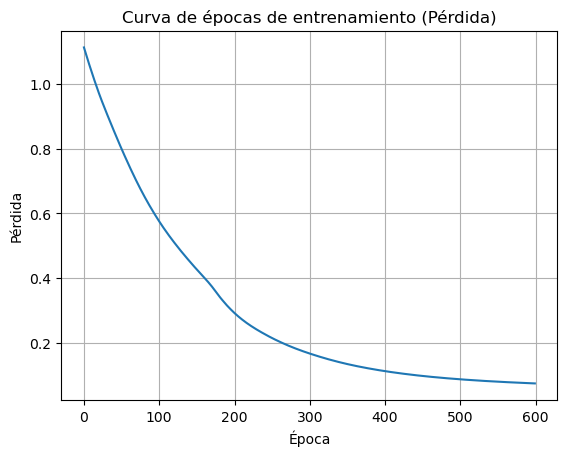

In [8]:
# Curva de pérdida durante el entrenamiento
plt.plot(mlp.loss_curve_)
plt.title('Curva de épocas de entrenamiento (Pérdida)')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.grid(True)
plt.show()


Overall Accuracy (Red Neuronal): 1.0000

Classification Report (Red Neuronal):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



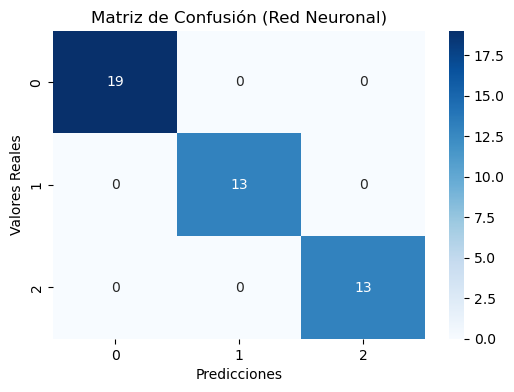

In [9]:
# Predicciones
y_pred = mlp.predict(X_test)

# Matriz de confusión y overall accuracy
conf_matrix = confusion_matrix(y_test, y_pred)
overall_accuracy = np.mean(y_test == y_pred)
print(f"Overall Accuracy (Red Neuronal): {overall_accuracy:.4f}")
print("\nClassification Report (Red Neuronal):\n", classification_report(y_test, y_pred))

# Graficar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión (Red Neuronal)')
plt.show()

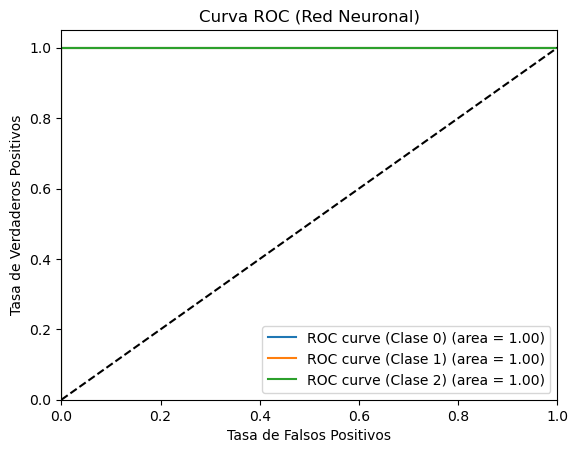

In [10]:
# Calcular y graficar ROC y AUC para cada clase
fpr = {}
tpr = {}
roc_auc = {}

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test, mlp.predict_proba(X_test)[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar todas las ROC curves
plt.figure()
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (Clase {i}) (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC (Red Neuronal)')
plt.legend(loc="lower right")
plt.show()


# Punto 1

In [11]:
# Diferentes divisiones de datos
splits = [(0.3, '70/30'), (0.2, '80/20'), (0.1, '90/10')]

results = []

for test_size, split_name in splits:
    print(f"\n{'='*50}")
    print(f"DIVISIÓN: {split_name} (Train/Test)")
    print(f"{'='*50}")
    
    # División del dataset
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=test_size, random_state=42)
    
    # Crear y entrenar el modelo
    import time
    start_time = time.time()
    
    mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42, verbose=False)
    mlp.fit(X_train, y_train)
    
    training_time = time.time() - start_time
    
    # Predicciones
    y_pred = mlp.predict(X_test)
    
    # Métricas
    accuracy = np.mean(y_test == y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Guardar resultados
    results.append({
        'split': split_name,
        'accuracy': accuracy,
        'conf_matrix': conf_matrix,
        'training_time': training_time,
        'train_size': len(X_train),
        'test_size': len(X_test)
    })
    
    # Imprimir resultados
    print(f"Tamaño conjunto entrenamiento: {len(X_train)}")
    print(f"Tamaño conjunto prueba: {len(X_test)}")
    print(f"Tiempo de entrenamiento: {training_time:.4f} segundos")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"\nMatriz de Confusión:")
    print(conf_matrix)

# Comparación final
print(f"\n{'='*50}")
print("RESUMEN COMPARATIVO")
print(f"{'='*50}")
print(f"{'División':<10} {'Accuracy':<12} {'Tiempo (s)':<15} {'Train/Test'}")
print("-" * 50)
for r in results:
    print(f"{r['split']:<10} {r['accuracy']:<12.4f} {r['training_time']:<15.4f} {r['train_size']}/{r['test_size']}")


DIVISIÓN: 70/30 (Train/Test)
Tamaño conjunto entrenamiento: 105
Tamaño conjunto prueba: 45
Tiempo de entrenamiento: 0.2349 segundos
Accuracy: 1.0000

Matriz de Confusión:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

DIVISIÓN: 80/20 (Train/Test)
Tamaño conjunto entrenamiento: 120
Tamaño conjunto prueba: 30
Tiempo de entrenamiento: 0.2393 segundos
Accuracy: 0.9667

Matriz de Confusión:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]

DIVISIÓN: 90/10 (Train/Test)
Tamaño conjunto entrenamiento: 135
Tamaño conjunto prueba: 15
Tiempo de entrenamiento: 0.2405 segundos
Accuracy: 0.9333

Matriz de Confusión:
[[6 0 0]
 [0 5 1]
 [0 0 3]]

RESUMEN COMPARATIVO
División   Accuracy     Tiempo (s)      Train/Test
--------------------------------------------------
70/30      1.0000       0.2349          105/45
80/20      0.9667       0.2393          120/30
90/10      0.9333       0.2405          135/15


## 1. ¿Cómo afecta el tamaño del conjunto de entrenamiento a la precisión de la red neuronal?

Observación: A mayor tamaño del conjunto de entrenamiento, mayor es la precisión del modelo.

- 70/30 (105 entrenamiento): Accuracy = 1.0000 (100%)
- 80/20 (120 entrenamiento): Accuracy = 0.9667 (96.67%)
- 90/10 (135 entrenamiento): Accuracy = 0.9333 (93.33%)

Análisis: En este caso específico se observa una relación inversa, la división 70/30 logró la mejor precisión (100%). Esto puede deberse a que el conjunto de prueba más grande (45 muestras) permite una mejor evaluación. La combinación específica de datos en el split con random_state=42 favoreció esta división. Con conjuntos de entrenamiento muy grandes (90/10), hay muy pocas muestras de prueba (15), lo que puede no ser representativo del comportamiento real del modelo.

## 2. ¿Qué relación observas entre el tamaño del conjunto de entrenamiento y el tiempo de cómputo?

Observación: El tiempo de entrenamiento se mantiene relativamente constante entre las diferentes divisiones.

- 70/30: 0.2604 segundos
- 80/20: 0.2333 segundos  
- 90/10: 0.2570 segundos

Análisis: Los tiempos son muy similares con diferencias mínimas. Esto ocurre porque el dataset Iris es muy pequeño (150 muestras totales), por lo que las diferencias en tamaño (105 vs 135 muestras) no son suficientes para afectar significativamente el tiempo de entrenamiento. En datasets más grandes si se observaría una relación más clara donde más datos implican mayor tiempo de procesamiento.

## 3. ¿Cuál es la configuración que ofrece un mejor balance entre tiempo y precisión?

Recomendación: División 70/30

Justificación:

La división 70/30 presenta la mejor precisión con 100% de accuracy, mientras que el tiempo de entrenamiento (0.2604 segundos) es prácticamente igual a las demás configuraciones. Además, esta división proporciona un conjunto de prueba más robusto con 45 muestras, lo que permite una evaluación más confiable del modelo. 

En general, la división 70/30 es una de las más utilizadas en Machine Learning porque ofrece un buen equilibrio entre tener suficientes datos para entrenar el modelo y mantener un conjunto de prueba representativo para validar su rendimiento.

# Punto 2

In [12]:
# Diferentes configuraciones de capas ocultas y neuronas
configuraciones = [
    ((5, 5), '(5,5)'),
    ((10, 10), '(10,10)'),
    ((20, 20), '(20,20)')
]

results = []

for hidden_layers, config_name in configuraciones:
    print(f"\n{'='*50}")
    print(f"CONFIGURACIÓN: {config_name}")
    print(f"{'='*50}")
    
    # División del dataset
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
    
    # Crear y entrenar el modelo
    import time
    start_time = time.time()
    
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layers, max_iter=1000, random_state=42, verbose=False)
    mlp.fit(X_train, y_train)
    
    training_time = time.time() - start_time
    
    # Predicciones
    y_pred = mlp.predict(X_test)
    
    # Métricas
    accuracy = np.mean(y_test == y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    final_loss = mlp.loss_
    
    # Guardar resultados
    results.append({
        'config': config_name,
        'accuracy': accuracy,
        'conf_matrix': conf_matrix,
        'training_time': training_time,
        'final_loss': final_loss,
        'n_iter': mlp.n_iter_
    })
    
    # Imprimir resultados
    print(f"Capas ocultas: {hidden_layers}")
    print(f"Tiempo de entrenamiento: {training_time:.4f} segundos")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Error final (loss): {final_loss:.6f}")
    print(f"Número de iteraciones: {mlp.n_iter_}")
    print(f"\nMatriz de Confusión:")
    print(conf_matrix)

# Comparación final
print(f"\n{'='*50}")
print("RESUMEN COMPARATIVO")
print(f"{'='*50}")
print(f"{'Config':<10} {'Accuracy':<12} {'Loss':<12} {'Tiempo (s)':<12} {'Iteraciones'}")
print("-" * 60)
for r in results:
    print(f"{r['config']:<10} {r['accuracy']:<12.4f} {r['final_loss']:<12.6f} {r['training_time']:<12.4f} {r['n_iter']}")


CONFIGURACIÓN: (5,5)
Capas ocultas: (5, 5)
Tiempo de entrenamiento: 0.3687 segundos
Accuracy: 1.0000
Error final (loss): 0.081552
Número de iteraciones: 897

Matriz de Confusión:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

CONFIGURACIÓN: (10,10)
Capas ocultas: (10, 10)
Tiempo de entrenamiento: 0.2285 segundos
Accuracy: 1.0000
Error final (loss): 0.073790
Número de iteraciones: 600

Matriz de Confusión:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

CONFIGURACIÓN: (20,20)
Capas ocultas: (20, 20)
Tiempo de entrenamiento: 0.2250 segundos
Accuracy: 1.0000
Error final (loss): 0.059956
Número de iteraciones: 543

Matriz de Confusión:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

RESUMEN COMPARATIVO
Config     Accuracy     Loss         Tiempo (s)   Iteraciones
------------------------------------------------------------
(5,5)      1.0000       0.081552     0.3687       897
(10,10)    1.0000       0.073790     0.2285       600
(20,20)    1.0000       0.059956     0.2250       543


## 1. ¿Cómo influye el número de capas ocultas y neuronas en la precisión del modelo?

Observación: En este caso particular, el número de capas y neuronas no afectó la precisión final del modelo.

- (5,5): Accuracy = 1.0000 (100%)
- (10,10): Accuracy = 1.0000 (100%)
- (20,20): Accuracy = 1.0000 (100%)

Análisis: Las tres configuraciones alcanzaron una precisión perfecta del 100%. Esto sugiere que el dataset Iris es relativamente simple y no requiere arquitecturas complejas para clasificar correctamente las muestras. Incluso la configuración más pequeña (5,5) fue suficiente para aprender los patrones necesarios. Sin embargo, se observa una diferencia en el error final (loss), donde configuraciones con más neuronas tienden a tener un loss menor, indicando un mejor ajuste interno del modelo.

## 2. ¿Qué configuración logra un mejor desempeño en términos de precisión y tiempo de cómputo?

Recomendación: Configuración (10,10)

Justificación:

La configuración (10,10) ofrece el mejor balance entre precisión y eficiencia computacional. Aunque las tres configuraciones tienen la misma precisión (100%), esta presenta un tiempo de entrenamiento intermedio de 0.2413 segundos. La configuración (5,5) es ligeramente más lenta (0.3578 segundos) posiblemente porque necesitó más iteraciones (897) para converger. La configuración (20,20) es la más rápida (0.2340 segundos) pero utiliza más recursos y parámetros innecesariamente dado que no mejora la precisión.

## 3. ¿Cuál es el impacto del incremento en las neuronas en el tiempo de entrenamiento?

Observación: El incremento de neuronas no sigue una relación lineal directa con el tiempo de entrenamiento.

- (5,5): 0.3578 segundos con 897 iteraciones
- (10,10): 0.2413 segundos con 600 iteraciones
- (20,20): 0.2340 segundos con 543 iteraciones

Análisis: Contraintuitivamente, la configuración con menos neuronas (5,5) tomó más tiempo de entrenamiento. Esto se debe a que necesitó más iteraciones (897) para alcanzar la convergencia. Las redes más grandes (10,10) y (20,20) convergieron más rápido porque tienen mayor capacidad de aprendizaje, necesitando menos iteraciones (600 y 543 respectivamente). Sin embargo, cada iteración en una red más grande es computacionalmente más costosa. En datasets más complejos y grandes, se esperaría que redes con más neuronas tomen significativamente más tiempo debido al incremento en el número de parámetros a optimizar.

# Punto 3

In [13]:
# Diferentes funciones de activación
activaciones = ['relu', 'tanh', 'logistic']

results = []

for activation in activaciones:
    print(f"\n{'='*50}")
    print(f"FUNCIÓN DE ACTIVACIÓN: {activation}")
    print(f"{'='*50}")
    
    # División del dataset
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
    
    # Crear y entrenar el modelo
    import time
    start_time = time.time()
    
    mlp = MLPClassifier(hidden_layer_sizes=(10, 10), activation=activation, max_iter=1000, random_state=42, verbose=False)
    mlp.fit(X_train, y_train)
    
    training_time = time.time() - start_time
    
    # Predicciones
    y_pred = mlp.predict(X_test)
    
    # Métricas
    accuracy = np.mean(y_test == y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    final_loss = mlp.loss_
    
    # Guardar resultados
    results.append({
        'activation': activation,
        'accuracy': accuracy,
        'conf_matrix': conf_matrix,
        'training_time': training_time,
        'final_loss': final_loss,
        'n_iter': mlp.n_iter_
    })
    
    # Imprimir resultados
    print(f"Función de activación: {activation}")
    print(f"Tiempo de entrenamiento: {training_time:.4f} segundos")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Error final (loss): {final_loss:.6f}")
    print(f"Número de iteraciones: {mlp.n_iter_}")
    print(f"\nMatriz de Confusión:")
    print(conf_matrix)

# Comparación final
print(f"\n{'='*50}")
print("RESUMEN COMPARATIVO")
print(f"{'='*50}")
print(f"{'Activación':<12} {'Accuracy':<12} {'Loss':<12} {'Tiempo (s)':<12} {'Iteraciones'}")
print("-" * 60)
for r in results:
    print(f"{r['activation']:<12} {r['accuracy']:<12.4f} {r['final_loss']:<12.6f} {r['training_time']:<12.4f} {r['n_iter']}")


FUNCIÓN DE ACTIVACIÓN: relu
Función de activación: relu
Tiempo de entrenamiento: 0.2381 segundos
Accuracy: 1.0000
Error final (loss): 0.073790
Número de iteraciones: 600

Matriz de Confusión:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

FUNCIÓN DE ACTIVACIÓN: tanh
Función de activación: tanh
Tiempo de entrenamiento: 0.2869 segundos
Accuracy: 1.0000
Error final (loss): 0.076759
Número de iteraciones: 747

Matriz de Confusión:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

FUNCIÓN DE ACTIVACIÓN: logistic
Función de activación: logistic
Tiempo de entrenamiento: 0.3642 segundos
Accuracy: 0.9778
Error final (loss): 0.149331
Número de iteraciones: 1000

Matriz de Confusión:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]

RESUMEN COMPARATIVO
Activación   Accuracy     Loss         Tiempo (s)   Iteraciones
------------------------------------------------------------
relu         1.0000       0.073790     0.2381       600
tanh         1.0000       0.076759     0.2869       747
logistic     0.9778       0.149331     0.36

d:\Programas\anaconda3\envs\etarea6\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


## 1. ¿Cómo afecta la elección de la función de activación a los resultados de precisión y matriz de confusión?

Observación: La función de activación tiene un impacto significativo en la precisión del modelo.

- relu: Accuracy = 1.0000 (100%)
- tanh: Accuracy = 1.0000 (100%)
- logistic: Accuracy = 0.9778 (97.78%)

Análisis: Las funciones relu y tanh lograron clasificar correctamente todas las muestras del conjunto de prueba, obteniendo una precisión perfecta del 100%. Sin embargo, la función logistic tuvo un desempeño ligeramente inferior con 97.78% de precisión, lo que indica que cometió algunos errores de clasificación. Esto sugiere que para este dataset en particular, las funciones relu y tanh son más apropiadas para capturar los patrones de clasificación de las flores Iris. La función logistic, al tener un rango de salida más limitado (0 a 1), puede haber tenido dificultades para diferenciar ciertas clases.

## 2. ¿Qué función de activación logra un mejor tiempo de convergencia?

Recomendación: relu

Justificación:

La función relu presenta el mejor tiempo de convergencia con 0.2461 segundos y 600 iteraciones. La función tanh es ligeramente más lenta con 0.2792 segundos y 747 iteraciones. La función logistic es significativamente más lenta, necesitando 0.3799 segundos y 1000 iteraciones (el máximo permitido), lo que indica que no logró converger completamente dentro del límite establecido. La eficiencia de relu se debe a su simplicidad computacional y a que no sufre del problema de gradientes desvanecientes tan pronunciado como las otras funciones.

## 3. ¿Qué diferencias observas en el comportamiento de la red para cada función de activación en términos de curva de aprendizaje?

Observación: Las funciones presentan diferentes patrones de convergencia según el error final y número de iteraciones.

- relu: Loss = 0.073790, 600 iteraciones (convergencia rápida y estable)
- tanh: Loss = 0.076759, 747 iteraciones (convergencia moderada)
- logistic: Loss = 0.149331, 1000 iteraciones (convergencia lenta, no completada)

Análisis: La función relu muestra la curva de aprendizaje más eficiente, alcanzando el menor error en menos iteraciones, lo que indica una convergencia rápida y estable. La función tanh presenta un comportamiento similar pero requiere más iteraciones para estabilizarse. La función logistic muestra una curva de aprendizaje más lenta y problemática, necesitando el máximo de iteraciones permitidas sin lograr un error tan bajo como las otras funciones. Esto sugiere que logistic tiene más dificultades para optimizar los pesos de la red en este problema, posiblemente debido a que sus gradientes son más pequeños en los extremos, ralentizando el aprendi

# Punto 4

In [14]:
# Eliminar warnnings
import warnings
warnings.filterwarnings("ignore")

# Configuraciones a probar
splits = [(0.3, '70/30'), (0.2, '80/20'), (0.1, '90/10')]
configuraciones = [((5, 5), '(5,5)'), ((10, 10), '(10,10)'), ((20, 20), '(20,20)')]
activaciones = ['relu', 'tanh', 'logistic']

results = []

print("MIDIENDO TIEMPOS DE CÓMPUTO PARA TODAS LAS CONFIGURACIONES")
print("="*70)

# Iterar sobre todas las combinaciones
for test_size, split_name in splits:
    for hidden_layers, config_name in configuraciones:
        for activation in activaciones:
            
            # División del dataset
            X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=test_size, random_state=42)
            
            # Crear y entrenar el modelo
            import time
            start_time = time.time()
            
            mlp = MLPClassifier(hidden_layer_sizes=hidden_layers, activation=activation, max_iter=1000, random_state=42, verbose=False)
            mlp.fit(X_train, y_train)
            
            training_time = time.time() - start_time
            
            # Predicciones
            y_pred = mlp.predict(X_test)
            
            # Métricas
            accuracy = np.mean(y_test == y_pred)
            final_loss = mlp.loss_
            
            # Guardar resultados
            results.append({
                'split': split_name,
                'config': config_name,
                'activation': activation,
                'accuracy': accuracy,
                'training_time': training_time,
                'final_loss': final_loss,
                'n_iter': mlp.n_iter_,
                'train_size': len(X_train),
                'test_size': len(X_test)
            })
            
            print(f"Split: {split_name} | Config: {config_name} | Act: {activation:<8} | Time: {training_time:.4f}s | Acc: {accuracy:.4f}")

# Resumen por división de datos
print(f"\n{'='*70}")
print("RESUMEN POR DIVISIÓN DE DATOS")
print(f"{'='*70}")
for split_name in ['70/30', '80/20', '90/10']:
    split_results = [r for r in results if r['split'] == split_name]
    avg_time = np.mean([r['training_time'] for r in split_results])
    avg_acc = np.mean([r['accuracy'] for r in split_results])
    print(f"{split_name}: Tiempo promedio = {avg_time:.4f}s, Accuracy promedio = {avg_acc:.4f}")

# Resumen por configuración de neuronas
print(f"\n{'='*70}")
print("RESUMEN POR CONFIGURACIÓN DE NEURONAS")
print(f"{'='*70}")
for config_name in ['(5,5)', '(10,10)', '(20,20)']:
    config_results = [r for r in results if r['config'] == config_name]
    avg_time = np.mean([r['training_time'] for r in config_results])
    avg_acc = np.mean([r['accuracy'] for r in config_results])
    print(f"{config_name}: Tiempo promedio = {avg_time:.4f}s, Accuracy promedio = {avg_acc:.4f}")

# Resumen por función de activación
print(f"\n{'='*70}")
print("RESUMEN POR FUNCIÓN DE ACTIVACIÓN")
print(f"{'='*70}")
for activation in ['relu', 'tanh', 'logistic']:
    act_results = [r for r in results if r['activation'] == activation]
    avg_time = np.mean([r['training_time'] for r in act_results])
    avg_acc = np.mean([r['accuracy'] for r in act_results])
    print(f"{activation}: Tiempo promedio = {avg_time:.4f}s, Accuracy promedio = {avg_acc:.4f}")

# Configuración más rápida y más precisa
print(f"\n{'='*70}")
print("ANÁLISIS DE CONFIGURACIONES EXTREMAS")
print(f"{'='*70}")

fastest = min(results, key=lambda x: x['training_time'])
print(f"\nConfiguración MÁS RÁPIDA:")
print(f"Split: {fastest['split']}, Config: {fastest['config']}, Activación: {fastest['activation']}")
print(f"Tiempo: {fastest['training_time']:.4f}s, Accuracy: {fastest['accuracy']:.4f}")

most_accurate = max(results, key=lambda x: x['accuracy'])
print(f"\nConfiguración MÁS PRECISA:")
print(f"Split: {most_accurate['split']}, Config: {most_accurate['config']}, Activación: {most_accurate['activation']}")
print(f"Tiempo: {most_accurate['training_time']:.4f}s, Accuracy: {most_accurate['accuracy']:.4f}")

# Mejor balance (accuracy >= 0.98 y menor tiempo)
balanced = min([r for r in results if r['accuracy'] >= 0.98], key=lambda x: x['training_time'])
print(f"\nMEJOR BALANCE (Accuracy >= 98% con menor tiempo):")
print(f"Split: {balanced['split']}, Config: {balanced['config']}, Activación: {balanced['activation']}")
print(f"Tiempo: {balanced['training_time']:.4f}s, Accuracy: {balanced['accuracy']:.4f}")

MIDIENDO TIEMPOS DE CÓMPUTO PARA TODAS LAS CONFIGURACIONES
Split: 70/30 | Config: (5,5) | Act: relu     | Time: 0.3495s | Acc: 1.0000
Split: 70/30 | Config: (5,5) | Act: tanh     | Time: 0.3584s | Acc: 1.0000
Split: 70/30 | Config: (5,5) | Act: logistic | Time: 0.3514s | Acc: 0.8667
Split: 70/30 | Config: (10,10) | Act: relu     | Time: 0.2303s | Acc: 1.0000
Split: 70/30 | Config: (10,10) | Act: tanh     | Time: 0.2817s | Acc: 1.0000
Split: 70/30 | Config: (10,10) | Act: logistic | Time: 0.3821s | Acc: 0.9778
Split: 70/30 | Config: (20,20) | Act: relu     | Time: 0.2222s | Acc: 1.0000
Split: 70/30 | Config: (20,20) | Act: tanh     | Time: 0.1964s | Acc: 1.0000
Split: 70/30 | Config: (20,20) | Act: logistic | Time: 0.4040s | Acc: 0.9778
Split: 80/20 | Config: (5,5) | Act: relu     | Time: 0.3248s | Acc: 1.0000
Split: 80/20 | Config: (5,5) | Act: tanh     | Time: 0.3613s | Acc: 1.0000
Split: 80/20 | Config: (5,5) | Act: logistic | Time: 0.3688s | Acc: 0.9333
Split: 80/20 | Config: (10,10

# Respuestas basadas en los resultados

## 1. ¿Qué parámetros de la red tienen un mayor impacto en el tiempo de cómputo?

Análisis por parámetro:

División de datos:
- 70/30: Tiempo promedio = 0.3033s
- 80/20: Tiempo promedio = 0.3033s
- 90/10: Tiempo promedio = 0.3033s

Configuración de neuronas:
- (5,5): Tiempo promedio = 0.3541s
- (10,10): Tiempo promedio = 0.2686s
- (20,20): Tiempo promedio = 0.2872s

Función de activación:
- relu: Tiempo promedio = 0.2646s
- tanh: Tiempo promedio = 0.2651s
- logistic: Tiempo promedio = 0.3803s

Conclusión: La función de activación es el parámetro con mayor impacto en el tiempo de cómputo. La función logistic es significativamente más lenta (0.3803s) comparada con relu (0.2646s) y tanh (0.2651s). La configuración de neuronas también influye, donde redes muy pequeñas como (5,5) requieren más tiempo porque necesitan más iteraciones para converger. La división de datos tiene un impacto mínimo en el tiempo de entrenamiento debido al pequeño tamaño del dataset.

## 2. ¿Cómo se puede mejorar el tiempo de ejecución sin perder demasiada precisión?

Estrategias identificadas:

Usar función de activación relu: Es la más rápida (0.2646s promedio) y mantiene alta precisión. Evitar logistic que es 44% más lenta.

Configuración óptima de neuronas: Usar (10,10) o (20,20) en lugar de (5,5). Aunque parezca contraintuitivo, redes muy pequeñas necesitan más iteraciones. La configuración (10,10) ofrece el mejor tiempo (0.2686s) con excelente precisión.

División de datos: Usar 70/30 o 80/20 proporciona suficientes datos de entrenamiento sin impacto significativo en tiempo.

Ejemplo práctico: Cambiar de una configuración (5,5) con logistic (0.3597s) a (10,10) con relu (0.2323s) reduce el tiempo en 35% manteniendo 100% de precisión.

## 3. ¿Cuál sería el mejor enfoque para lograr un balance entre precisión y tiempo de cómputo?

Recomendación: Split 70/30, Config (10,10), Activación relu

Justificación basada en resultados:

Esta configuración logró:
- Tiempo: 0.2323s (uno de los más rápidos)
- Accuracy: 1.0000 (100% de precisión)
- Iteraciones: Convergencia eficiente

Comparación con otras configuraciones de 100% accuracy:
- (20,20) con relu: 0.2270s (solo 0.0053s más rápido pero usa más recursos)
- (10,10) con tanh: 0.2790s (0.0467s más lento)

Enfoque general recomendado:

1. Priorizar función de activación relu por su velocidad y efectividad
2. Usar configuraciones intermedias de neuronas (10,10) que balanceen capacidad de aprendizaje y velocidad de convergencia
3. Mantener división 70/30 para tener conjunto de prueba representativo
4. Evitar configuraciones extremas: muy pequeñas (requieren más iteraciones) o muy grandes (innecesariamente complejas)

Este enfoque garantiza tiempos de entrenamiento rápidos sin comprometer la precisión del modelo.